In [1]:
# Import relevant packages

import uproot # conda install -c conda-forge uproot
import vector # conda install -c conda-forge vector
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.colors as colors

In [176]:
tree = uproot.concatenate("/Users/isaac/Desktop/mucol_plotting_scripts/macros/LCIO/ntup_tracks*.root:tracks_tree")

In [177]:
vector.register_awkward()
treeData=ak.zip({
    "pt" : tree["pT"],
    "ptT" : tree["pTtruth"],
    "phi" : tree["phi"],
    "theta" : tree["theta"],
    "d0" : tree["d0"],
    "z0" : tree["z0"],
    "z_truth" : tree["z_truth"],
    "sigma_d0" : tree["sigma_z0"],
    "sigma_z0" : tree["sigma_z0"],
    "omega" : tree["omega"],
    "chi2" : tree["chi2"],
    "ndf" : tree["ndf"],
    "nhits" : tree["nhits"],
    "nholes" : tree["nholes"],
    "pdgID" : tree["pdgID"]
})

In [178]:
def findLen(akwardarray):
    print(len(akwardarray))
    for i in range(len(akwardarray)):
        print(len(akwardarray[i]))

In [179]:
# a handy plotting function
def plot1DHistogram(data,bins,scale='linear',label="", savefig=False, dpi=300):
    
    # handle data, there must be a smarter way to do this...
    if type(data[0])==np.int64 : data_flat=data
    elif type(data[0])==np.int32 : data_flat=data
    elif type(data[0])==np.float32 : data_flat=data
    elif type(data[0])==np.float64 : data_flat=data
    else: data_flat = ak.flatten(data)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    ax.hist(data_flat, bins=bins)
    
    # handle labels
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    plt.yscale(scale)
    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

In [180]:
# a handy plotting function
def plot2DHistogram(datax, datay, bins=100, norm="log", label="", savefig=False, dpi=300):
    
    data_flatx = np.array(np.ravel(datax)).T
    data_flaty = np.array(np.ravel(datay)).T
    #print(len(data_flatx),data_flatx)
    #print(len(data_flaty),data_flaty)
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)
    
    hh = ax.hist2d(data_flatx, data_flaty, bins=bins, norm=norm, cmap="plasma")
    
    title  = "" if len(label.split(";")) < 1 else label.split(";")[0]  
    xlabel = "" if len(label.split(";")) < 2 else label.split(";")[1]  
    ylabel = "" if len(label.split(";")) < 3 else label.split(";")[2]  
    zlabel = "" if len(label.split(";")) < 4 else label.split(";")[3] 
    
    ax.set_title(title)
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    
    # colorbars are annoying
    cbar = fig.colorbar(hh[3])
    #cbar.ax.tick_params(labelsize=tick_font_size)
    cbar.set_label(zlabel, fontsize=15)

    if savefig:
        plt.savefig(title + ".png", dpi=dpi)
    plt.show()

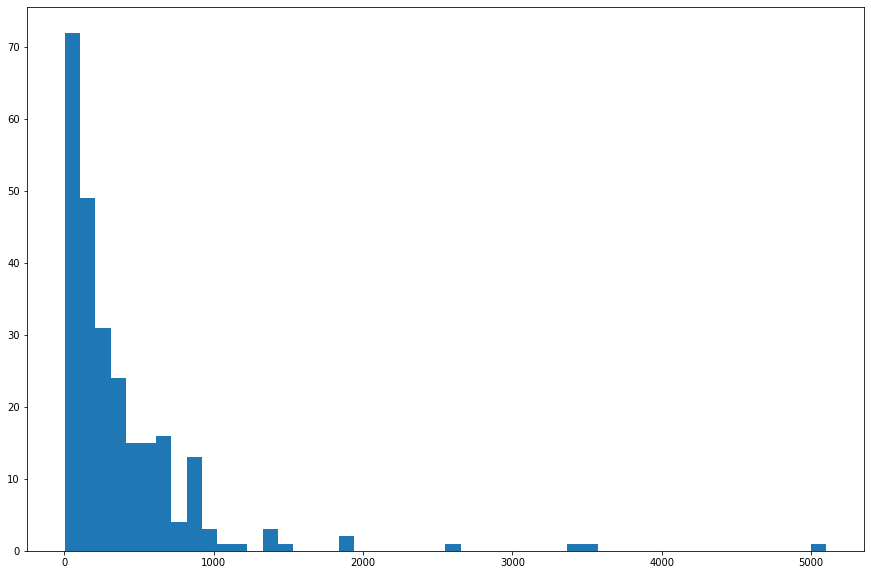

In [181]:
plot1DHistogram(treeData.pt, bins=50)

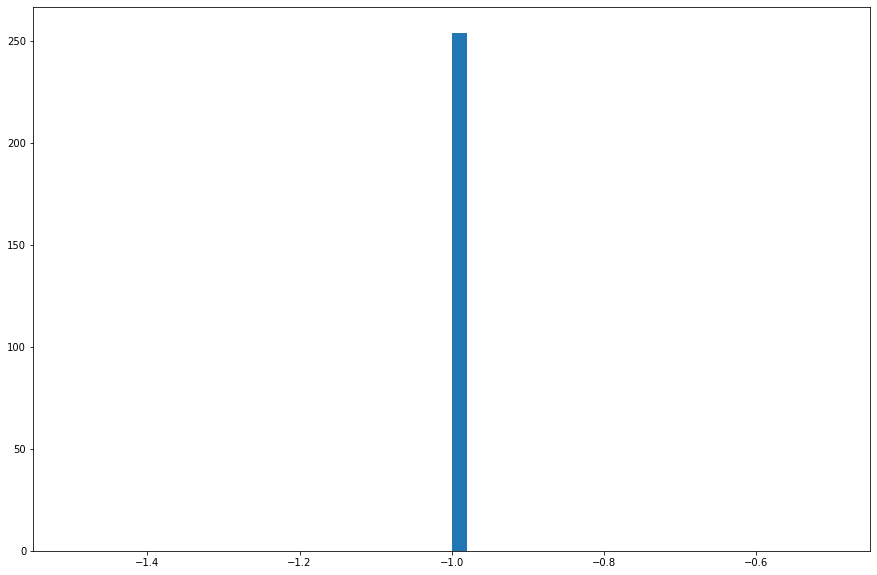

In [182]:
plot1DHistogram(treeData.ptT, bins=50)

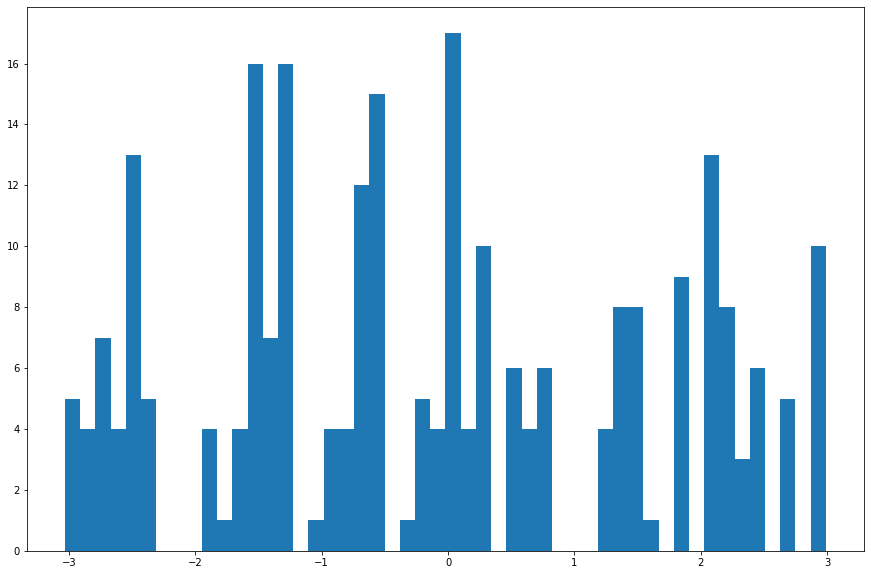

In [183]:
plot1DHistogram(treeData.phi, bins=50)

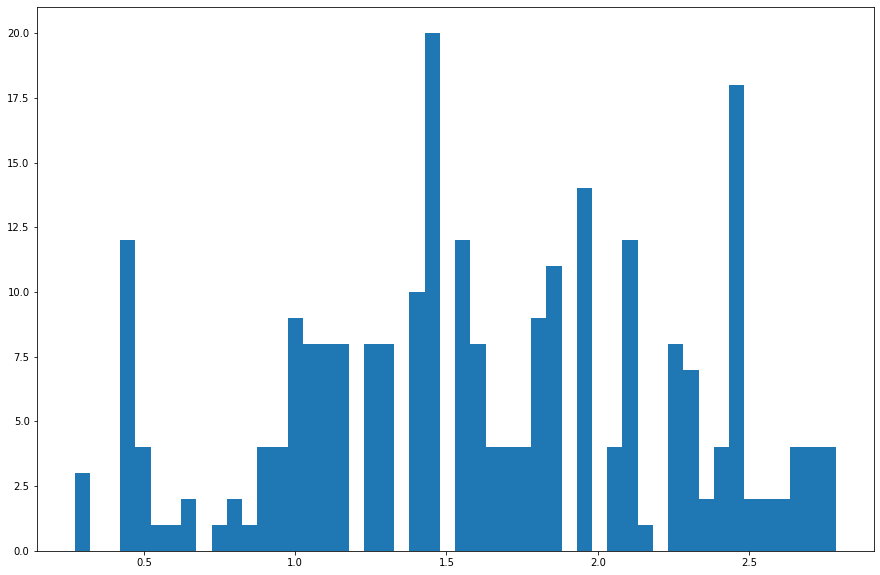

In [184]:
plot1DHistogram(treeData.theta, bins=50)

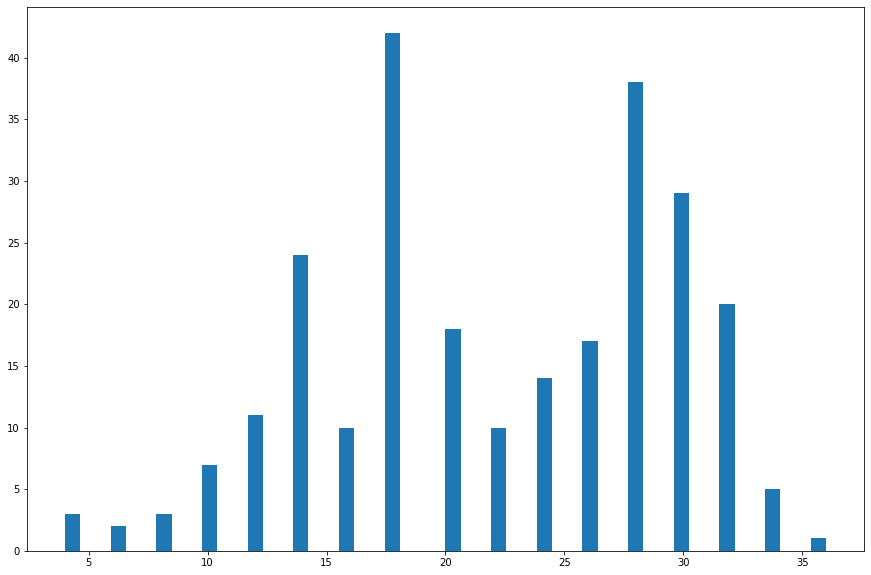

In [186]:
plot1DHistogram(treeData.ndf, bins=50)

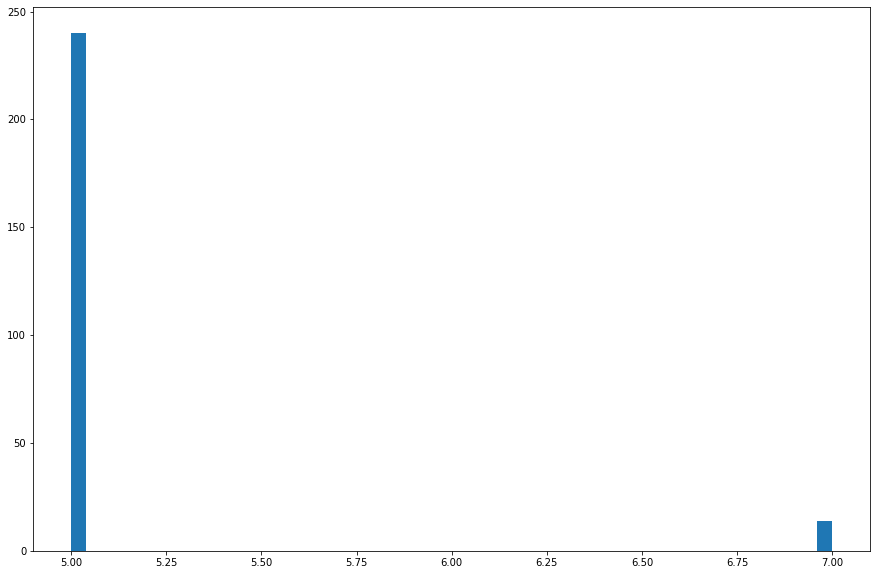

In [197]:
plot1DHistogram(treeData.ndf-(treeData.nhits*2-5), bins=50)